In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!wget -cq https://raw.githubusercontent.com/sparkm/mlpt/master/13-Logistic-Regression/titanic_train.csv

In [3]:
train = pd.read_csv('titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [5]:
#determine how clean your data is

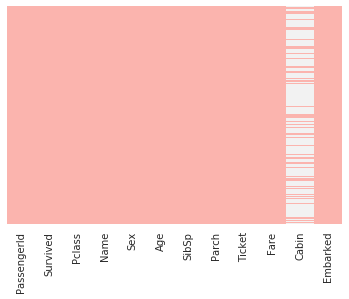

In [46]:
sns.heatmap(train.isnull(), yticklabels = False, cmap ='Pastel1', cbar= False)

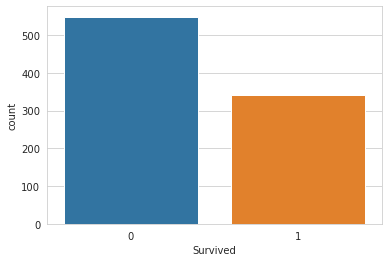

In [18]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data = train)

In [19]:
#counts the # of records ^
# around 560 died and 340 survived on the titanic

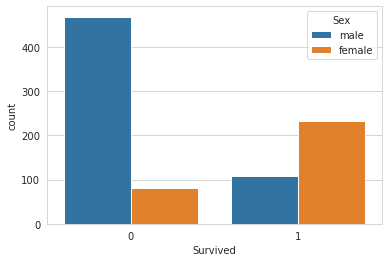

In [20]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Sex', data = train)

In [21]:
#majority of women survived in comparison to men
#this data could be sckewed because women + children may of have been given priority to aboard the lifeboats

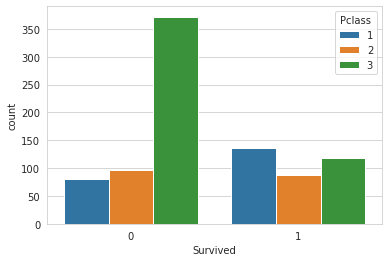

In [22]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Pclass', data = train)

In [24]:
#the poorest class mainly died on the titanic 
# data could be sckewed because there were more third class passengers in comparison to second and first class
# data couldbe sckewed because first and second class passengers were given more priority to aboard the lifeboats

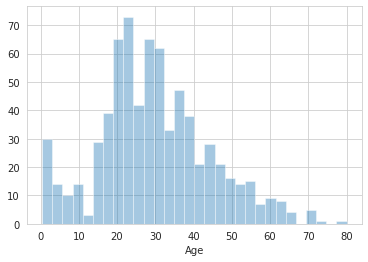

In [27]:
sns.distplot(train['Age'].dropna(), kde = False, bins = 30)

In [28]:
# most the passengers on the titanic are 20-30 years of age 

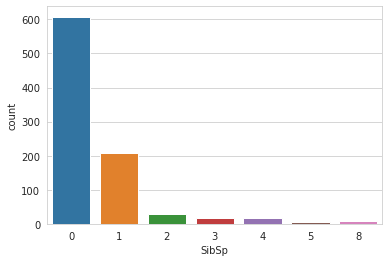

In [29]:
sns.countplot (x = 'SibSp', data = train)

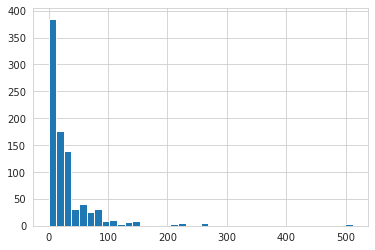

In [35]:
train['Fare'].hist(bins = 40)

In [36]:
#third class fares are the least

In [37]:
#we can conclude that we have missing data: could have taken the average of the data to fill in, 
#saw from data that 20-30 year olds were traveling and older people were traveling in 1st class,
#we could calculate the average based on the passenger class (distribution of 3rd and 1st class)

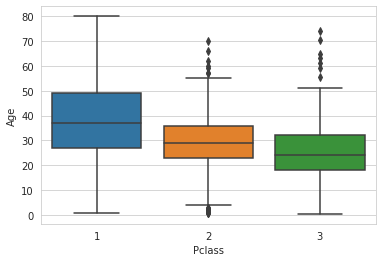

In [38]:
sns.boxplot(x = 'Pclass', y = 'Age', data = train)

In [40]:
#passenger class one: average age is 30-40, older than class 2 and 3
#older people have more more > can afford more expensive tickets on the titanic

In [44]:
def inpute_age (cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        
        elif Pclass ==2:
            return 29
        
        else:
            return 24
        
    else:
        return Age

In [45]:
train['Age'] = train[['Age', 'Pclass']].apply(inpute_age, axis=1)

In [47]:
#fills all of the age gaps 

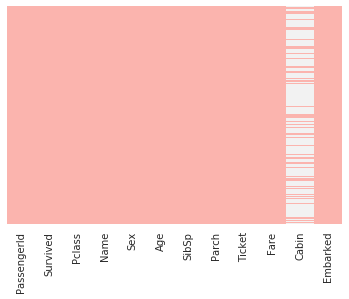

In [48]:
sns.heatmap(train.isnull(), yticklabels = False, cmap ='Pastel1', cbar= False)

In [49]:
train.drop('Cabin', axis = 1, inplace = True)

In [50]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


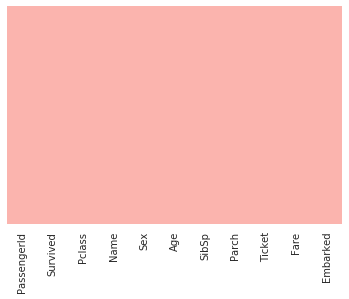

In [51]:
sns.heatmap(train.isnull(), yticklabels = False, cmap ='Pastel1', cbar= False)

In [52]:
#cleaned all of the data

In [60]:
#logistical regression works best with numerical values, must convert numerical columns to use 

In [55]:
sex = pd.get_dummies(train['Sex'], drop_first = True)
embark = pd.get_dummies(train['Embarked'], drop_first = True)

In [56]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [57]:
#male = 1, female = 0

In [59]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [62]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)

In [63]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [64]:
train = pd.concat ([train, sex, embark], axis = 1)

In [65]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [66]:
#training data

In [67]:
from sklearn.model_selection import train_test_split

In [71]:
X = train.drop('Survived', axis = 1)

In [76]:
y = train['Survived']

In [78]:
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.33, random_state=42)

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
logmodel = LogisticRegression()

In [81]:
logmodel.fit(X_train, y_train)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
predictions = logmodel.predict(X_test)

In [83]:
from sklearn.metrics import confusion_matrix

In [84]:
print(confusion_matrix (y_test, predictions))

[[154  21]
 [ 36  84]]


In [85]:
#trying to compare the labels

In [88]:
57/295*100


19.322033898305087

In [89]:
#gives the accuracy rate 